# Files and direstory

In [1]:
import os
os.listdir()

['7_SVM.ipynb',
 'DecisionTree.ipynb',
 'Employee_attrition.csv',
 'framingham.csv',
 'heart.csv',
 'LogisticRegression.ipynb',
 'LogisticRegression.txt',
 'student-por.csv',
 'test.csv',
 'Train and test.zip',
 'train.csv',
 'wine+quality.zip',
 'winequality-red.csv',
 'winequality-white.csv',
 '__pycache__']

# Read Data

In [2]:
import pandas as pd
data=pd.read_csv("heart.csv").iloc[:,:-1]
col=data.columns
print("Data column names : ",col)
data.head()

Data column names :  Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease'],
      dtype='object')


age  sex  pain type   BP  cholestrol  fbs  resting ecg  max heart rate  \
0   70    1          4  130         322    0            2             109   
1   67    0          3  115         564    0            2             160   
2   57    1          2  124         261    0            0             141   
3   64    1          4  128         263    0            0             105   
4   74    0          2  120         269    0            2             121   

   exercise angina  ST depression  ST slope  flouroscopy coloured  thal  \
0                0            2.4         2                     3     3   
1                0            1.6         2                     0     7   
2                0            0.3         1                     0     7   
3                1            0.2         2                     1     7   
4                1            0.2         1                     1     3   

   heart disease  
0              2  
1              1  
2              2  
3              1  
4              1

# Clean Data

In [3]:
data.isnull().sum()

age                     0
sex                     0
pain type               0
BP                      0
cholestrol              0
fbs                     0
resting ecg             0
max heart rate          0
exercise angina         0
ST depression           0
ST slope                0
flouroscopy coloured    0
thal                    0
heart disease           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
data.describe()

age         sex   pain type          BP  cholestrol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    3.174074  131.344444  249.659259    0.148148   
std      9.109067    0.468195    0.950090   17.861608   51.686237    0.355906   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  245.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  280.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

       resting ecg  max heart rate  exercise angina  ST depression  \
count   270.000000      270.000000       270.000000      270.00000   
mean      1.022222      149.677778         0.329630        1.05000   
std       0.997891       23.165717         0.470952        1.14521   
min       0.000000       71.000000         0.000000        0.00000   
25%       0.000000      133.000000         0.000000        0.00000   
50%       2.000000      153.500000         0.000000        0.80000   
75%       2.000000      166.000000         1.000000        1.60000   
max       2.000000      202.000000         1.000000        6.20000   

         ST slope  flouroscopy coloured        thal  heart disease  
count  270.000000            270.000000  270.000000     270.000000  
mean     1.585185              0.670370    4.696296       1.444444  
std      0.614390              0.943896    1.940659       0.497827  
min      1.000000              0.000000    3.000000       1.000000  
25%      1.000000              0.000000    3.000000       1.000000  
50%      2.000000              0.000000    3.000000       1.000000  
75%      2.000000              1.000000    7.000000       2.000000  
max      3.000000              3.000000    7.000000       2.000000

# Plots - Pairplot and heatmap

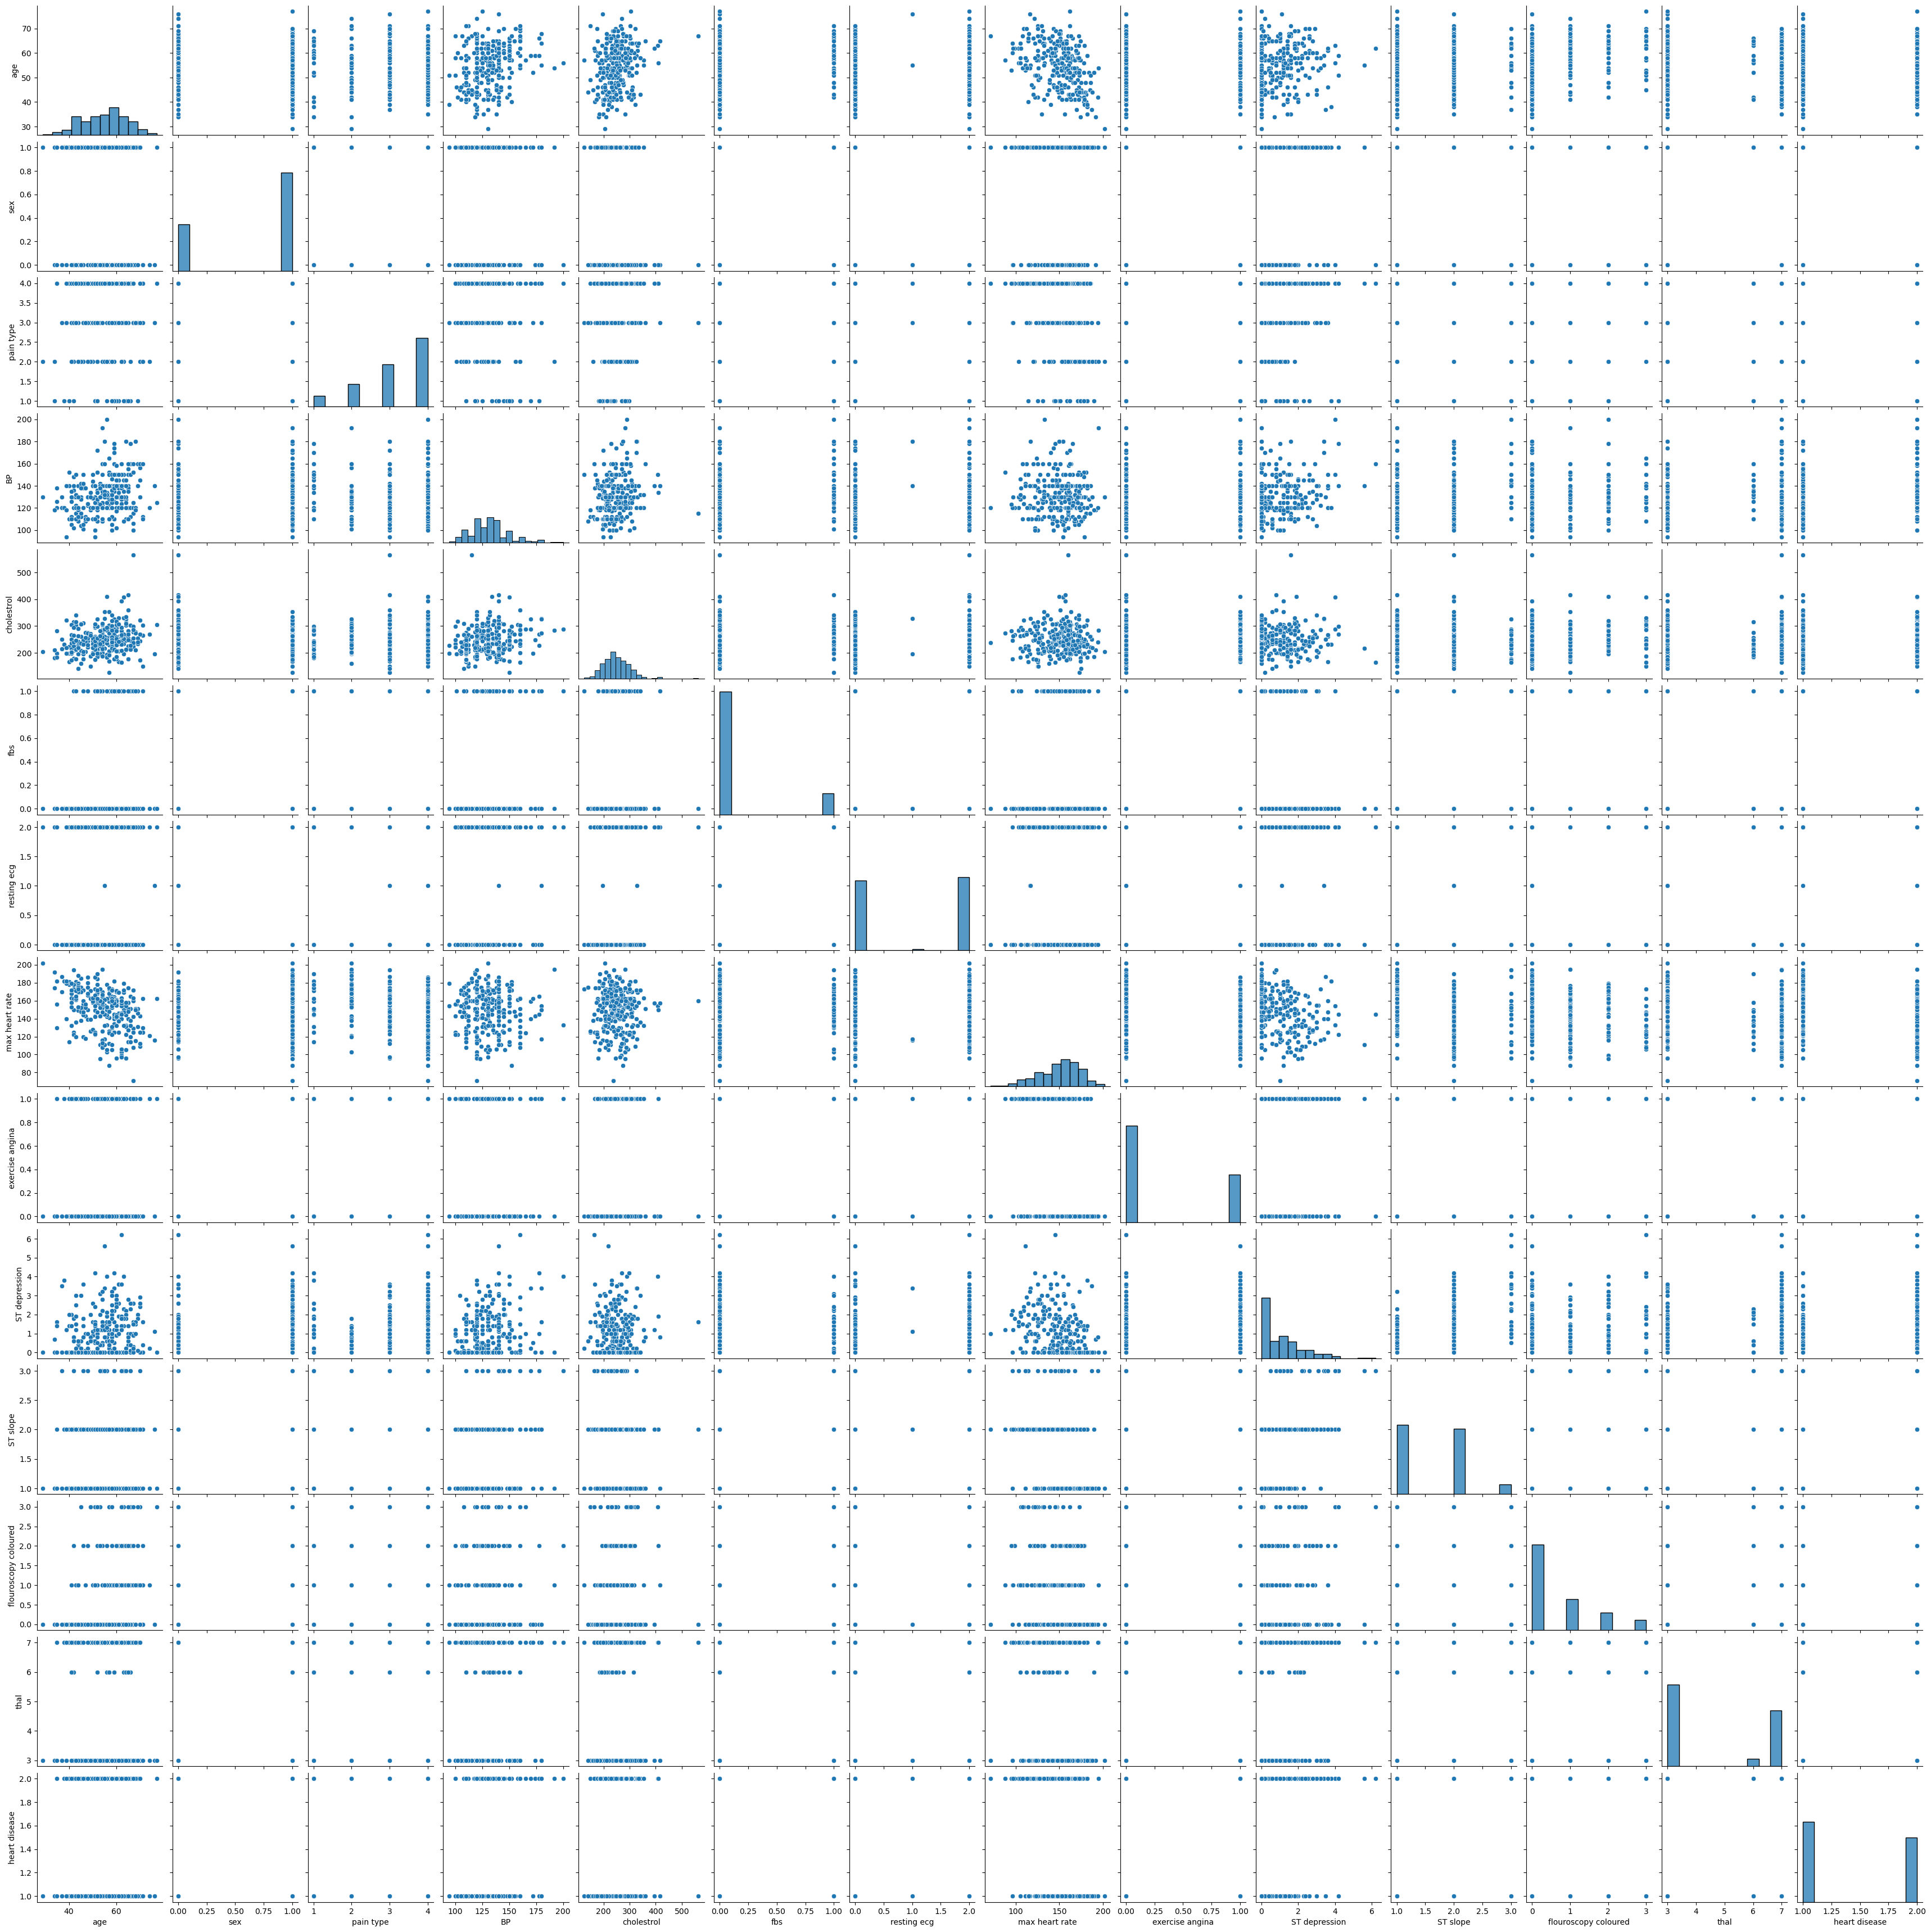

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

<Axes: >

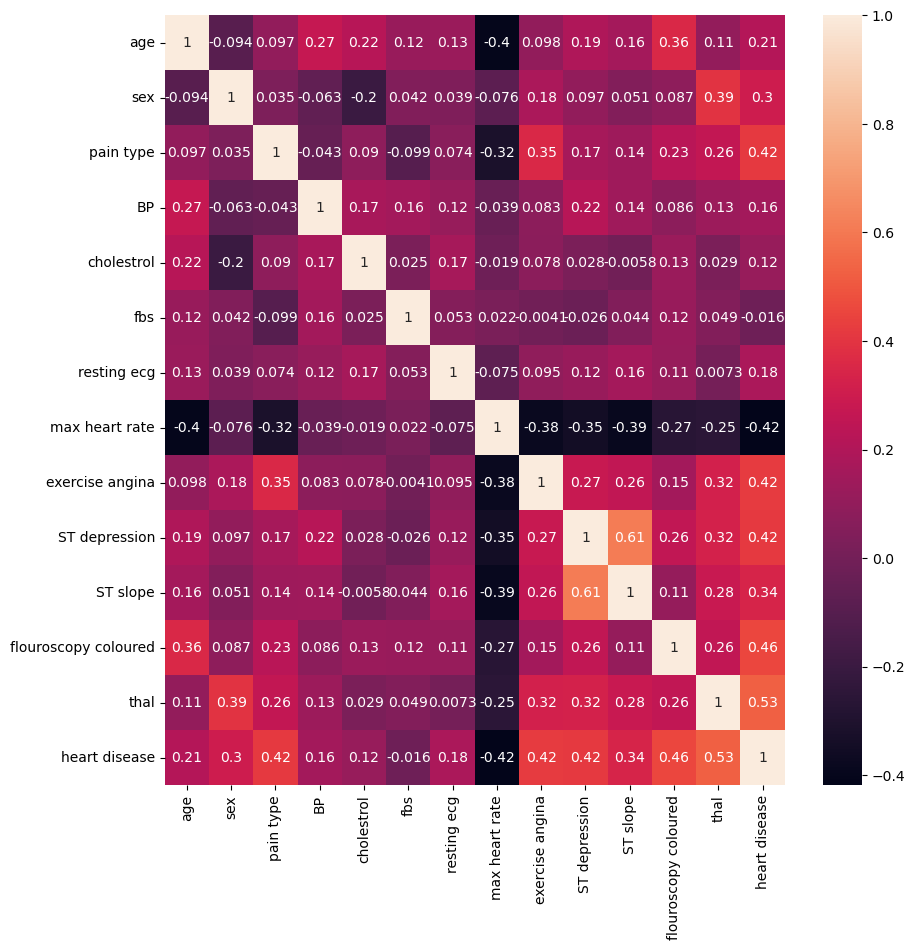

In [7]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)

# Train test split

In [8]:
from sklearn.model_selection import train_test_split
x=data[col[:-1]]
y=data[col[-1]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("Size of x train : ",len(x_train))
print("Size of y train : ",len(y_train))
print("Size of x test : ",len(x_test))
print("Size of y test : ",len(y_test))

Size of x train :  189
Size of y train :  189
Size of x test :  81
Size of y test :  81


# Train a model

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predicted 

In [10]:
y_pred=model.predict(x_test)
print(y_pred)

[2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 2 2 1 1
 1 2 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 1 1 2 2 1 1]


# Test a model by metrics

Training accuracy :  1.0
Testing accuracy :  0.7777777777777778
Model accuracy :  0.7777777777777778
Confusion Matrix:
[[35  9]
 [ 9 28]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        44
           2       0.76      0.76      0.76        37

    accuracy                           0.78        81
   macro avg       0.78      0.78      0.78        81
weighted avg       0.78      0.78      0.78        81

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  

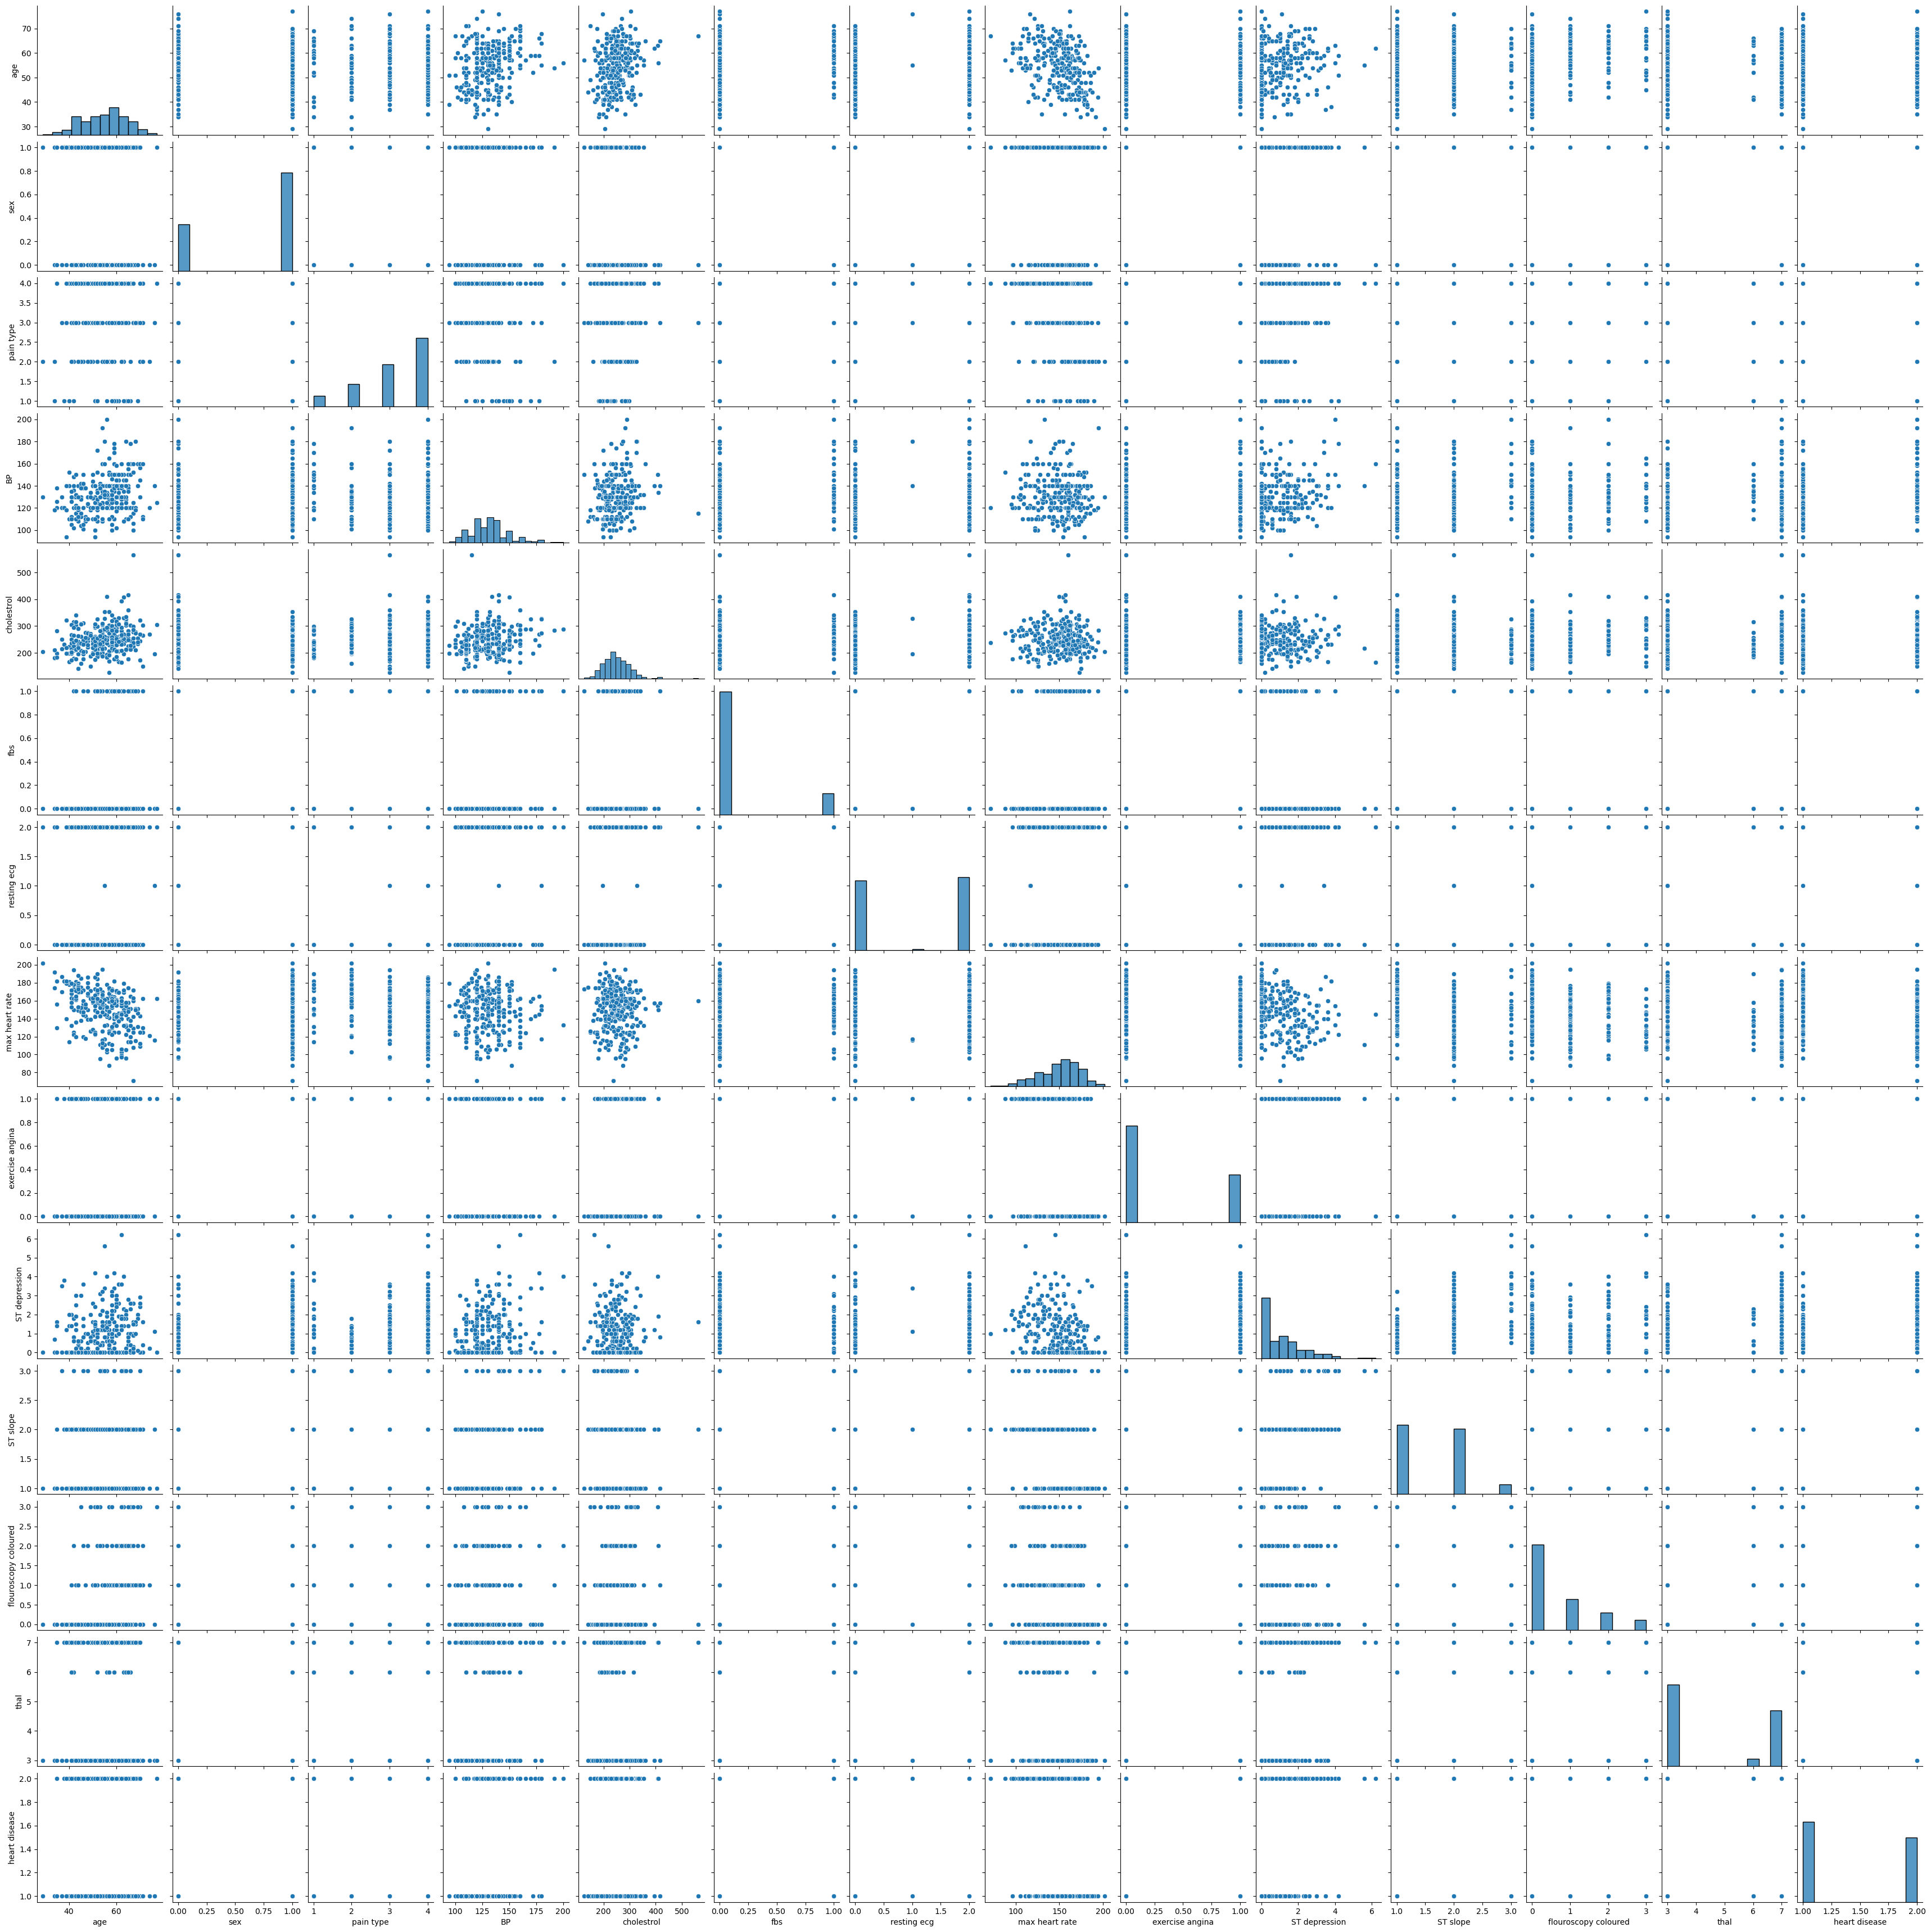

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print("Training accuracy : ",train_score)
print("Testing accuracy : ",test_score)
model_accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy : ",model_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

data.info()

data.describe()

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

# Draw decision tree

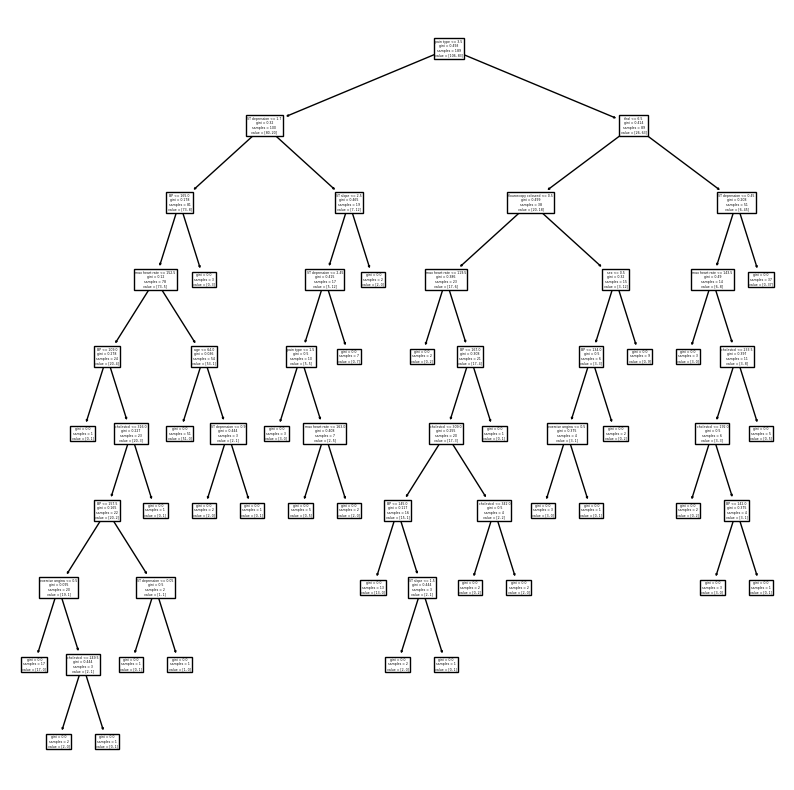

In [12]:
from sklearn import tree
plt.figure(figsize=[10,10])
tree.plot_tree(model,feature_names=['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg','max heart rate', 'exercise angina', 'ST depression', 'ST slope','flouroscopy coloured', 'thal'])
plt.show()

Data column names :  Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease'],
      dtype='object')
Size of x train :  189
Size of y train :  189
Size of x test :  81
Size of y test :  81
[1 1 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 1 2 2 1 1
 2 2 2 1 2 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 2 1 2 2 1 1 1 1 2 1
 2 1 1 1 1 1 1]
Training accuracy :  1.0
Testing accuracy :  0.7037037037037037
Model accuracy :  0.7037037037037037
Confusion Matrix:
[[32 13]
 [11 25]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.71      0.73        45
           2       0.66      0.69      0.68        36

    accuracy                           0.70        81
   macro avg       0.70      0.70      0.70        81
weighted avg       0.71      0.70      0.70        81

<class 'p

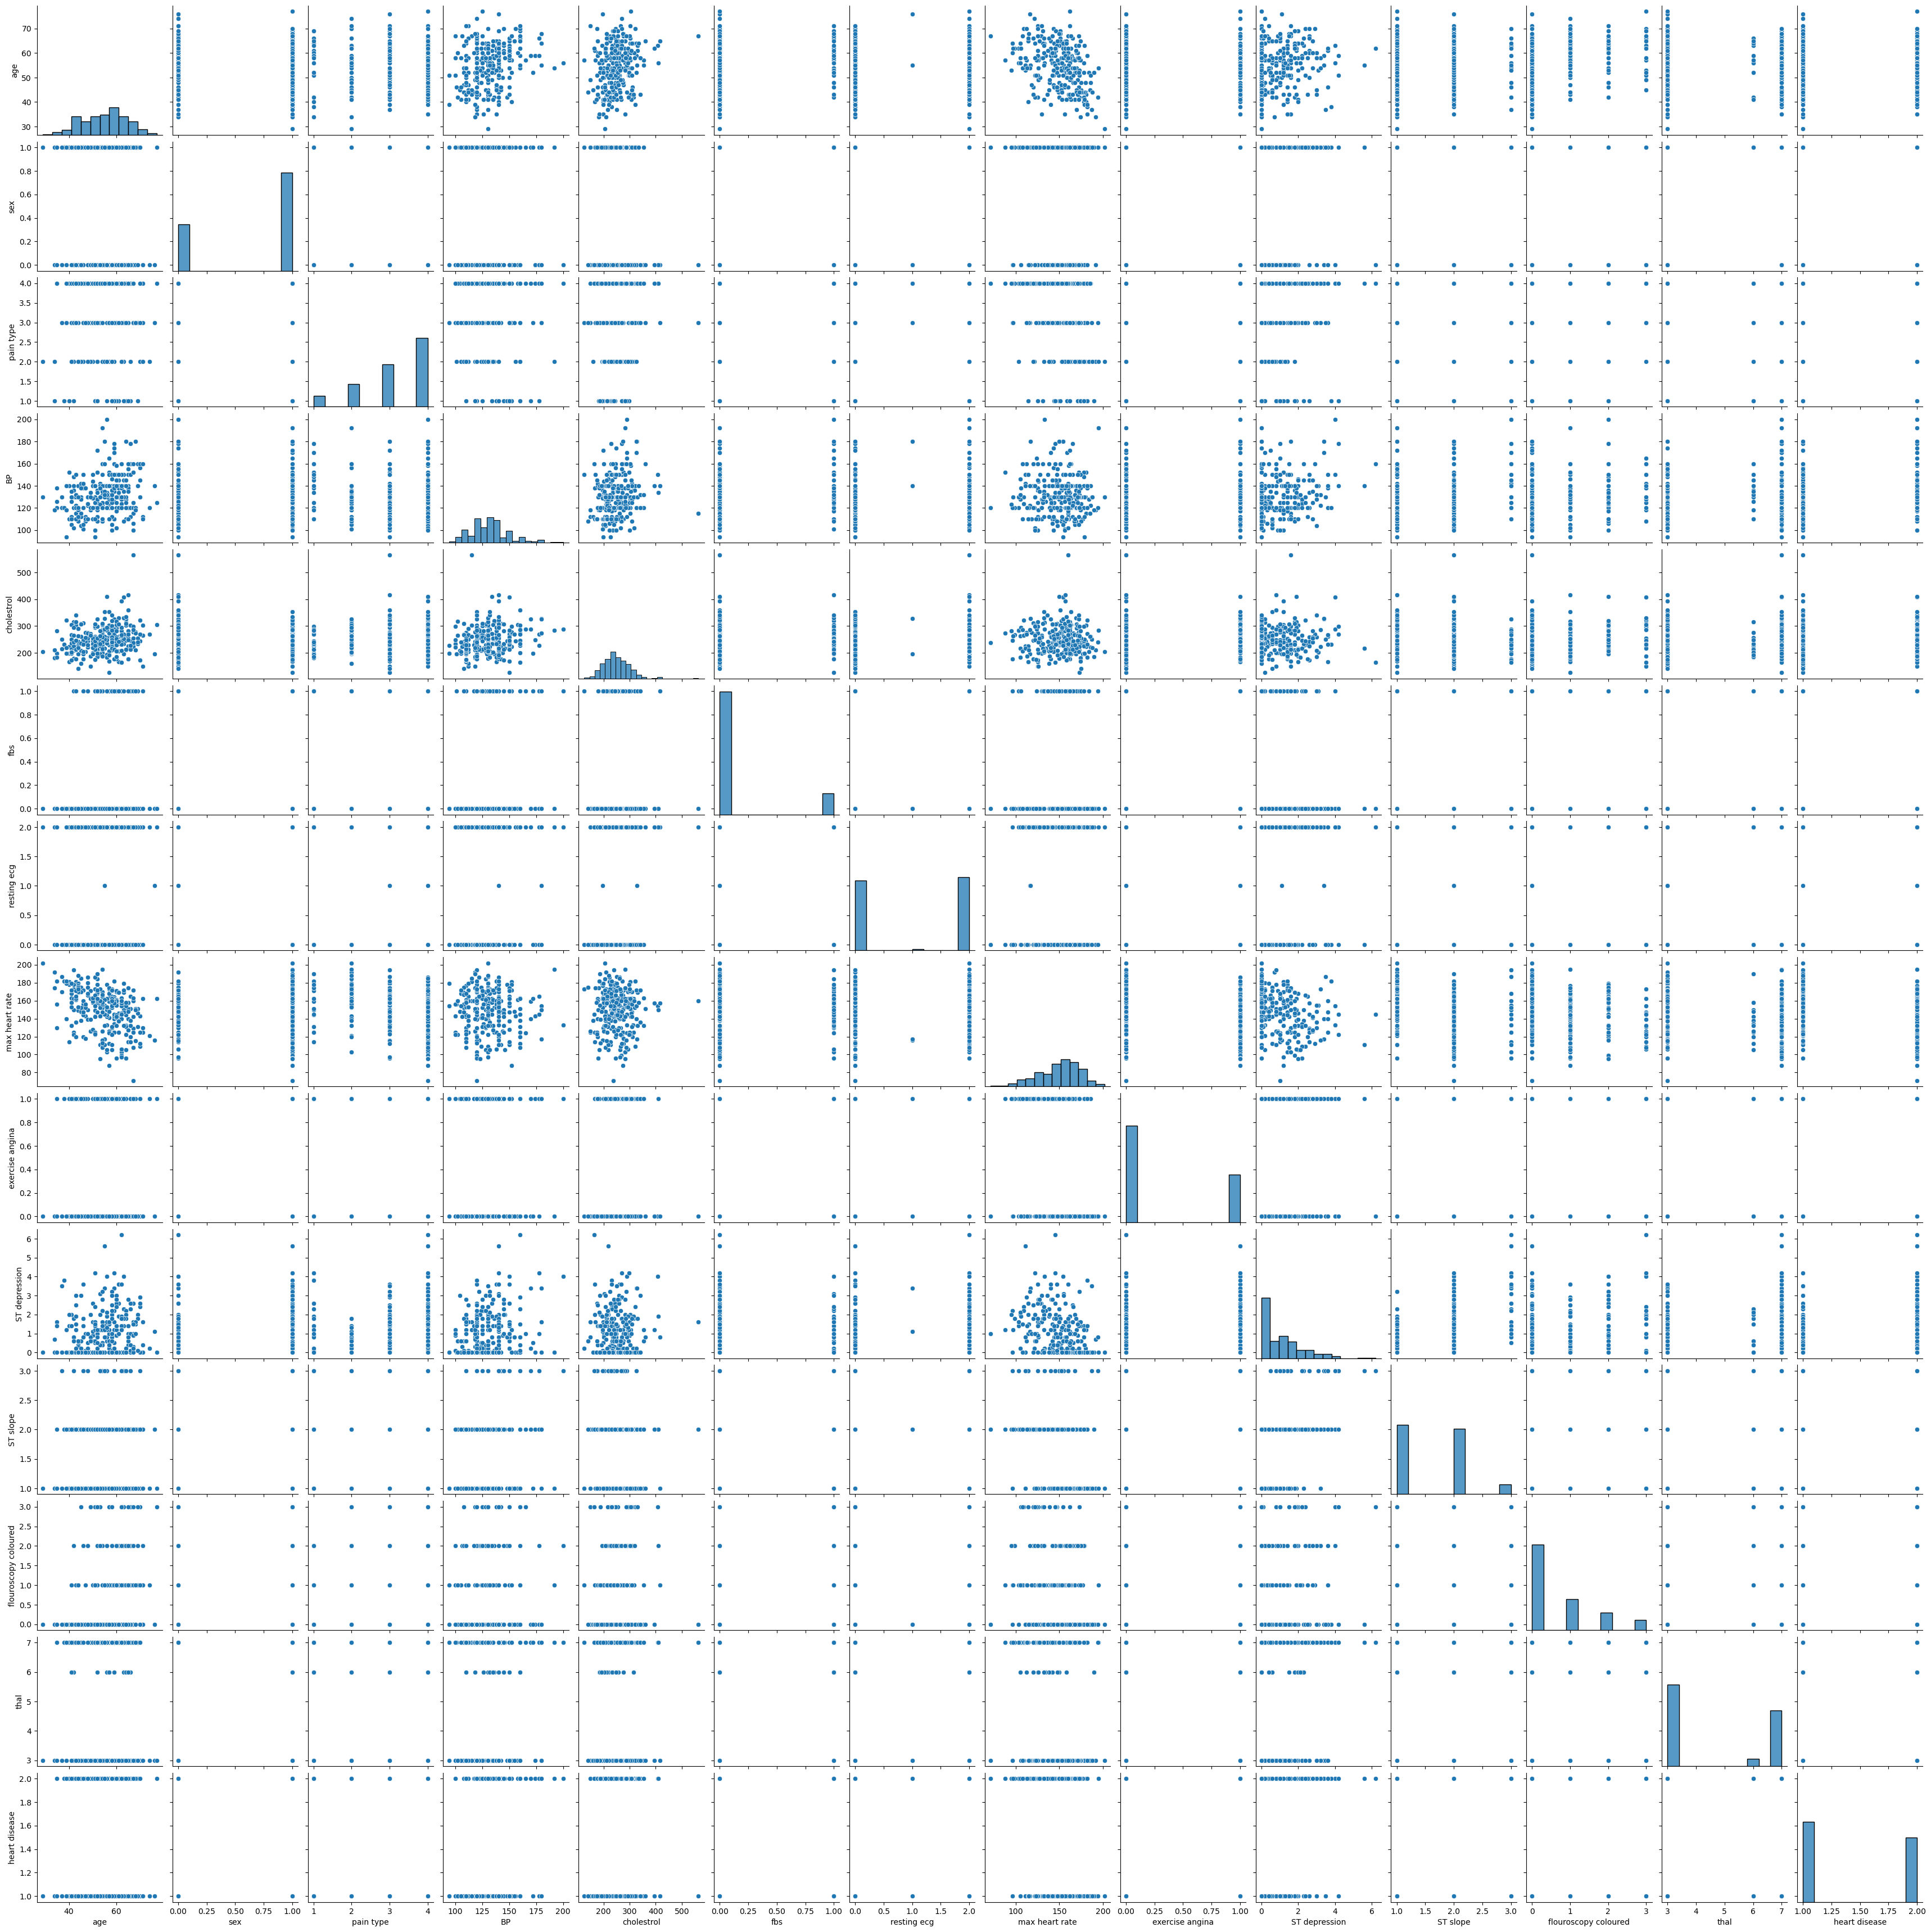

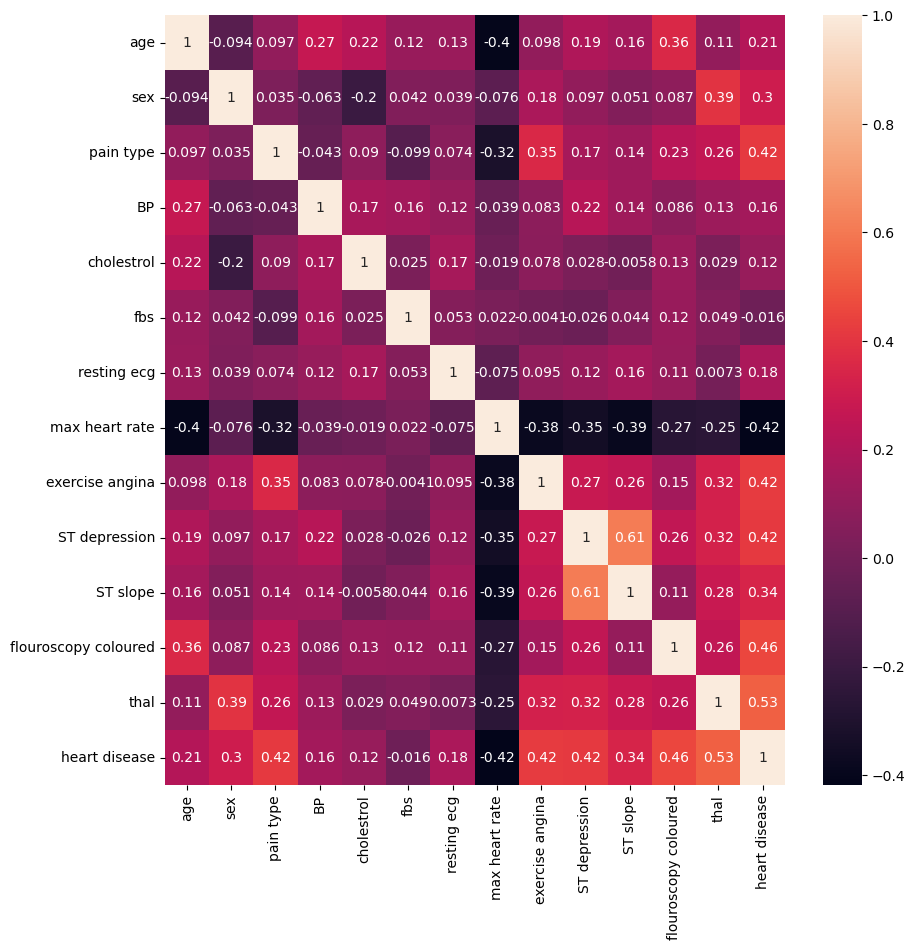

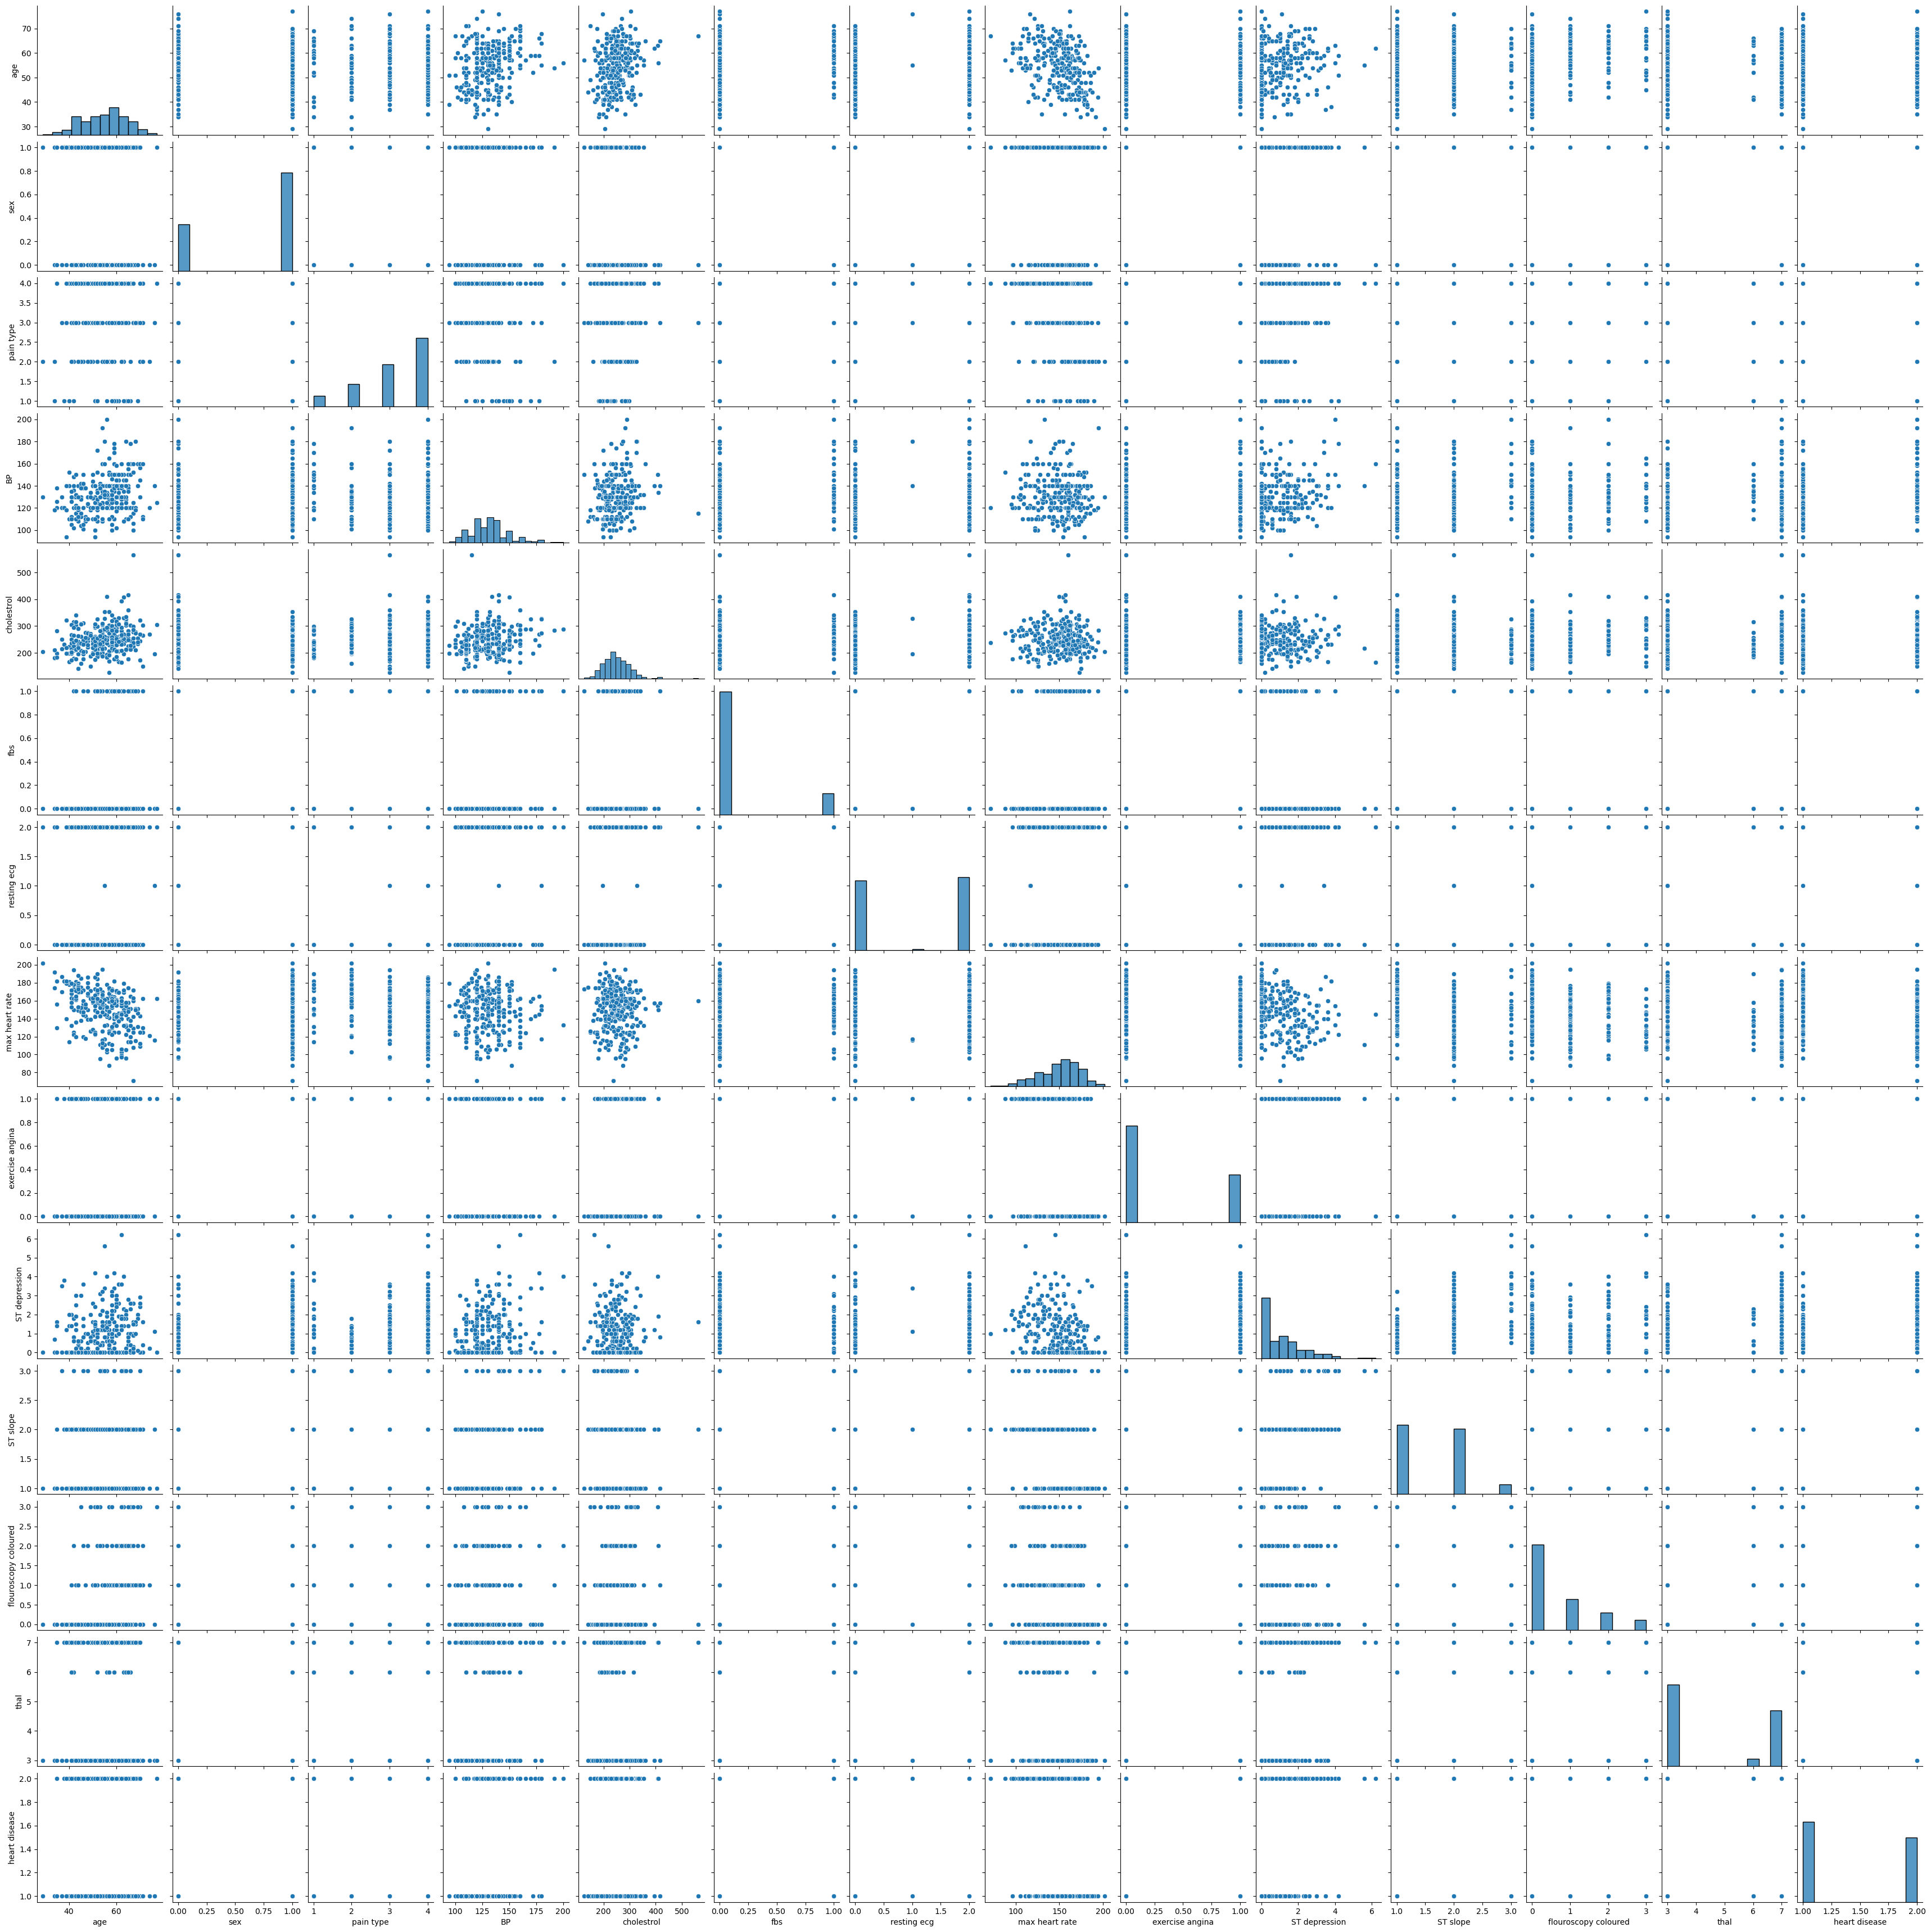

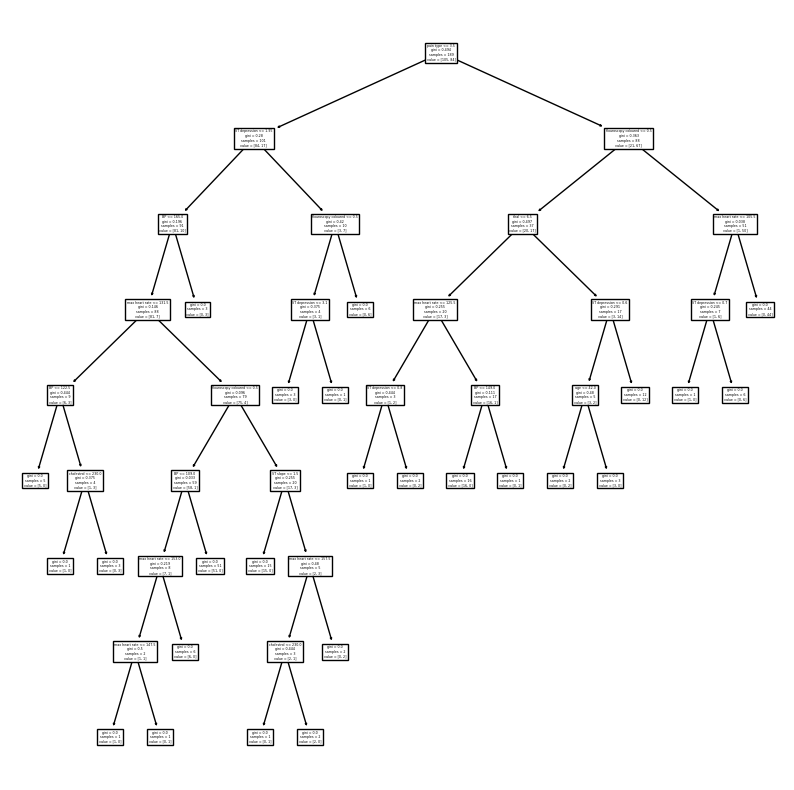

In [13]:
import os
os.listdir()

import pandas as pd
data=pd.read_csv("heart.csv").iloc[:,:-1]
col=data.columns
print("Data column names : ",col)
data.head()

data.isnull().sum()

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)

from sklearn.model_selection import train_test_split
x=data[col[:-1]]
y=data[col[-1]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("Size of x train : ",len(x_train))
print("Size of y train : ",len(y_train))
print("Size of x test : ",len(x_test))
print("Size of y test : ",len(y_test))

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(y_pred)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print("Training accuracy : ",train_score)
print("Testing accuracy : ",test_score)
model_accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy : ",model_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

data.info()

data.describe()

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

from sklearn import tree
plt.figure(figsize=[10,10])
tree.plot_tree(model,feature_names=['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg','max heart rate', 'exercise angina', 'ST depression', 'ST slope','flouroscopy coloured', 'thal'])
plt.show()